## Workers Salary Prediction model

In [447]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pickle

In [448]:
# load the dataset
data = pd.read_csv('Salary Data.csv')
# check the first few rows of the dataset
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [449]:
# drop missing values
data = data.dropna()

In [450]:
# check for duplicate values
data.duplicated().sum()

49

In [451]:
# drop duplicate values
data = data.drop_duplicates()

#  `Eploratoty Data Analysis(EDA)
THIS IS A CRUCIAL STEP IN DATA PREPARAtion 

In [452]:
# Stat info
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
Years of Experience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [453]:
# do a value counts on categorical features
data.value_counts(subset=data['Gender'])

Gender
Male      170
Female    154
Name: count, dtype: int64

In [454]:
# do a value counts on categorical features
data.value_counts(subset=data['Job Title'])

Job Title
Director of Operations                9
Director of Marketing                 8
Senior Marketing Manager              8
Senior Project Manager                7
Senior Business Analyst               6
                                     ..
Junior Designer                       1
Junior Data Scientist                 1
Junior Data Analyst                   1
Junior Customer Support Specialist    1
Web Developer                         1
Name: count, Length: 174, dtype: int64

In [455]:
# do a value counts on categorical features
data.value_counts(subset=data['Education Level'])

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_8212\2069901047.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.barplot(x='Education Level', y= 'Salary', data=data, color= 'pink',hue= 'Education Level')


<Axes: xlabel='Education Level', ylabel='Salary'>

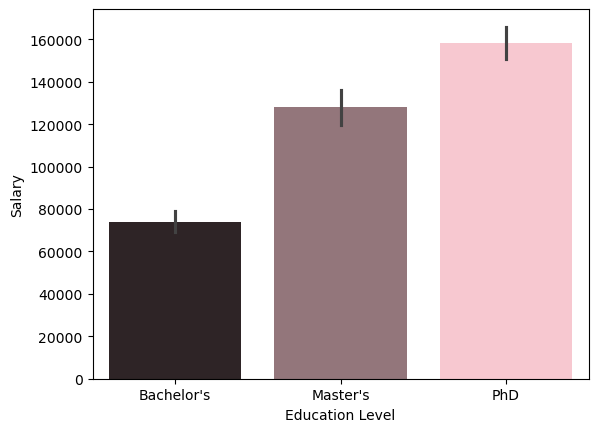

In [456]:
# plot visuals against salary
sns.barplot(x='Education Level', y= 'Salary', data=data, color= 'pink',hue= 'Education Level')

C:\Users\dell\AppData\Local\Temp\ipykernel_8212\1698944980.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.barplot(x='Gender', y= 'Salary', data=data, color= 'yellow',hue= 'Education Level')


<Axes: xlabel='Gender', ylabel='Salary'>

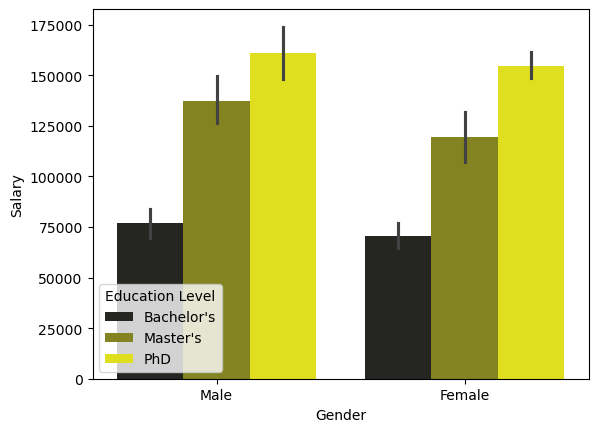

In [457]:
# plot visuals against salary
sns.barplot(x='Gender', y= 'Salary', data=data, color= 'yellow',hue= 'Education Level')

<Axes: xlabel='Job Title', ylabel='Salary'>

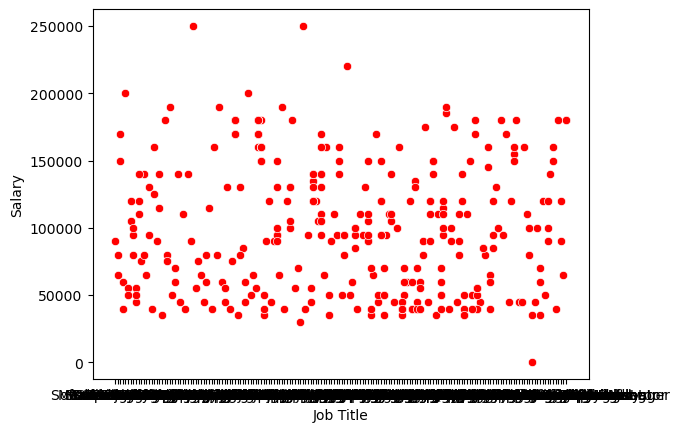

In [458]:
# plot visuals against salary
sns.scatterplot(x='Job Title', y= 'Salary', data= data, color= 'red')

<Axes: xlabel='Years of Experience', ylabel='Salary'>

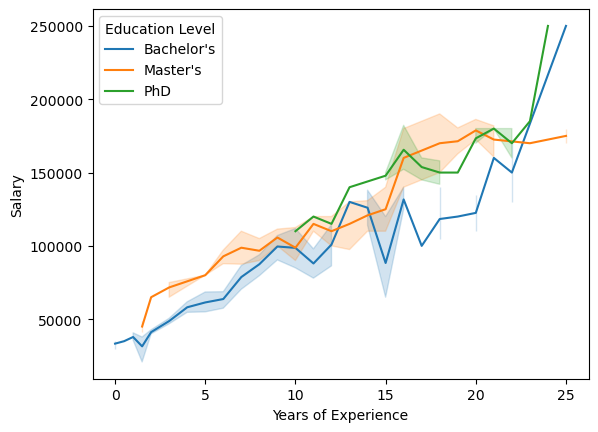

In [459]:
# plot visuals against salary
sns.lineplot (x='Years of Experience', y= 'Salary', data= data, color= 'red', hue= 'Education Level') 
            

<Axes: xlabel='Age', ylabel='Salary'>

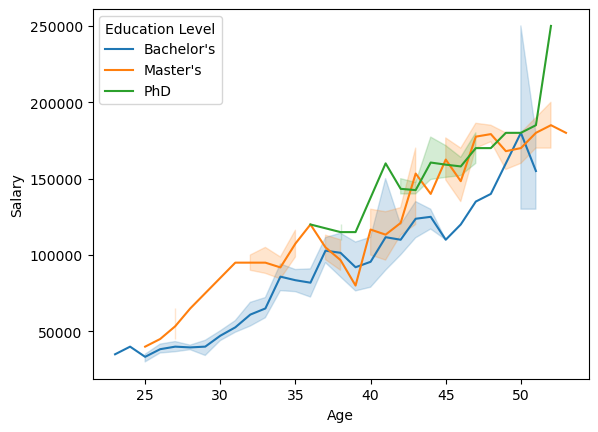

In [460]:
# plot visuals against salary
sns.lineplot (x='Age', y= 'Salary', data= data, color= 'red', hue= 'Education Level') 

In [461]:
# drop unwanted columns
data.drop(columns=['Gender', 'Job Title'], inplace=True)

In [462]:
# check new data
data.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


## Feature Engineering

In [463]:
# copy data with a new variable name
data2 = data.copy()
# check data
data2.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


In [464]:
# Map education level to numerical values 
education_mapping = {
    "Bachelor's" : 1,
    "Master's" : 2, 
    "PhD" : 3
}

# apply the mapping to data  and create a new column
data['Education Level'] = data['Education Level'].map(education_mapping)
# check data
data.head()




,Age,Education Level,Years of Experience,Salary
0,32.0,1,5.0,90000.0
1,28.0,2,3.0,65000.0
2,45.0,3,15.0,150000.0
3,36.0,1,7.0,60000.0
4,52.0,2,20.0,200000.0


<Axes: >

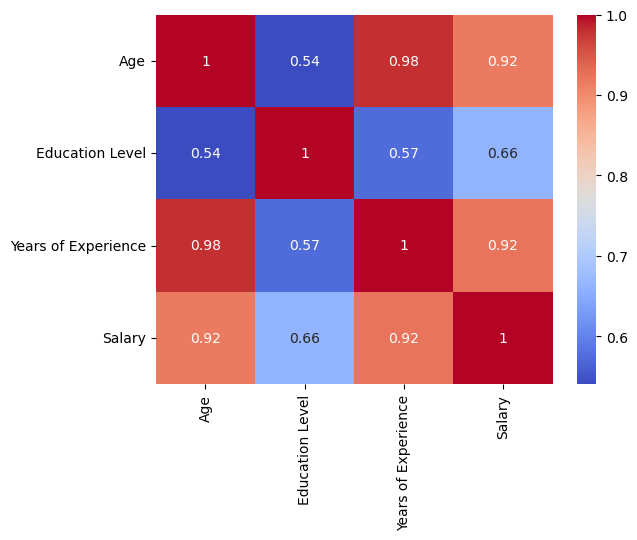

In [465]:
# perform feature engineering on the dataset with correlation
# check correlation
sns.heatmap(data.corr(), annot= True, cmap = 'coolwarm')

In [466]:
# select dependent and independent variable
y = data2["Salary"].values # target var
x = data2[["Age","Education Level","Years of Experience"]]

## Split the dataset

In [467]:
# split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print shapes
print("x_train", x_train.shape, "x_test", x_test.shape)
print("y_train", y_train.shape, "y_test", y_test.shape)


x_train (259, 3) x_test (65, 3)
y_train (259,) y_test (65,)


## Choose a Model

In [468]:
# import model
from sklearn.linear_model import LinearRegression
# run the model
Lr = LinearRegression()
# CHECK
Lr 

LinearRegression()

In [469]:
# make pipeline with cat and numeric feature
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# List your feature columns
categorical_features = ['Education Level']
numeric_features = ['Age', 'Years of Experience']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Create the pipeline
pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)
# fit the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education Level']),
                                                 ('num', 'passthrough',
                                                  ['Age',
                                                   'Years of Experience'])])),
                ('linearregression', LinearRegression())])

In [470]:
# make prdiction on the test set
y_pred = pipeline.predict(x_test)
# check y_pred
y_pred

array([123859.02659632, 132736.89554644,  52793.03050663, 119771.9762291 ,
       106685.77319555, 106685.77319555,  52210.54600717,  61088.41495728,
       175378.78679862,  52183.28976686,  43915.16155651, 129583.44439658,
       106685.77319555, 154118.48303063,  78844.15285752, 172807.82014823,
       101159.33955907, 113190.65965905,  44497.64605598,  43915.16155651,
        78261.66835805,  60505.93045782,  61088.41495728,  27324.39265521,
       195705.49134925,  90095.00429425, 153535.99853117, 169654.36899837,
       177598.63873112,  38190.74375626, 117783.49407817, 167083.40234797,
        89710.50395856, 155283.45202957, 148394.06523038,  54754.25641725,
        83986.08615831,  94852.43725935,  98390.3887449 ,  37196.5026808 ,
        92281.47060896,  49639.57935677, 103730.30620947,  57934.96380742,
        41344.19490612,  52210.54600717, 124057.0107601 ,  46486.12820691,
       154700.9675301 ,  90095.00429425, 160974.48421202,  41344.19490612,
        55363.99715703,  

In [471]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
mae = mean_absolute_error(y_test, y_pred)
print(F"Test Mean Squared Error:", (mse))
print(f"Test R^2 Score:", (r2))
print(f"Mean Absolute Error:", (mae))


Test Mean Squared Error: 247766062.26584977
Test R^2 Score: 86.8892068474802
Mean Absolute Error: 11688.977684384005


In [476]:
# Create a DataFrame for the new data
new_data = pd.DataFrame([[20, "PhD", 5]], columns=['Age', 'Education Level', 'Years of Experience'])
# Predict using the pipeline
pipeline.predict(new_data)

array([57727.32077269])

In [478]:
# Save the data to file
with open('Salary.pkl', 'wb') as file:
    pickle.dump(pipeline, file) 